In [7]:
import tensorflow as tf
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0                    # 정규화
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# EDA

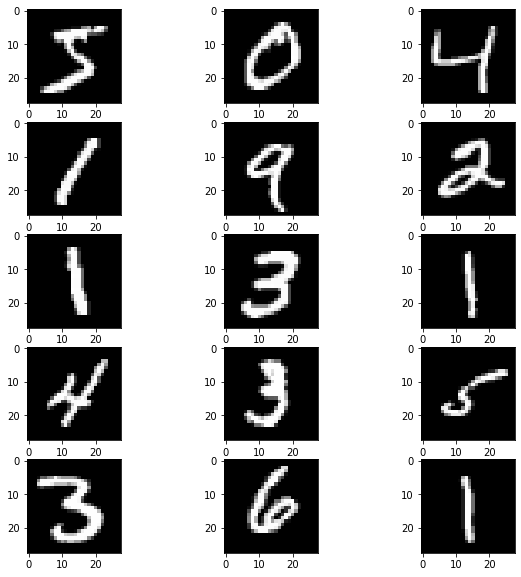

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5, 3, c+1)
        plt.imshow(x_train[c], cmap = 'gray')
        c += 1
        
plt.show()

print(y_train[:15])

# Modeling

In [3]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                   tf.keras.layers.Dense(128, activation = 'relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
hist = model.fit(x_train, y_train, epochs = 10, validation_split = .2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3211 - acc: 0.9064 - val_loss: 0.1539 - val_acc: 0.9577
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1556 - acc: 0.9537 - val_loss: 0.1171 - val_acc: 0.9659
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1157 - acc: 0.9658 - val_loss: 0.0972 - val_acc: 0.9699
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0973 - acc: 0.9698 - val_loss: 0.0885 - val_acc: 0.9730
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0802 - acc: 0.9755 - val_loss: 0.0866 - val_acc: 0.9733
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0706 - acc: 0.9779 - val_loss: 0.0836 - val_acc: 0.9744
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0608 - acc: 0.9805 - val_loss: 0.0796 - val_acc: 0.9768
Epoch 8/10
1500/1500 [==============================] - 4s 2ms

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0765 - acc: 0.9774


[0.07652531564235687, 0.977400004863739]

In [6]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plotting

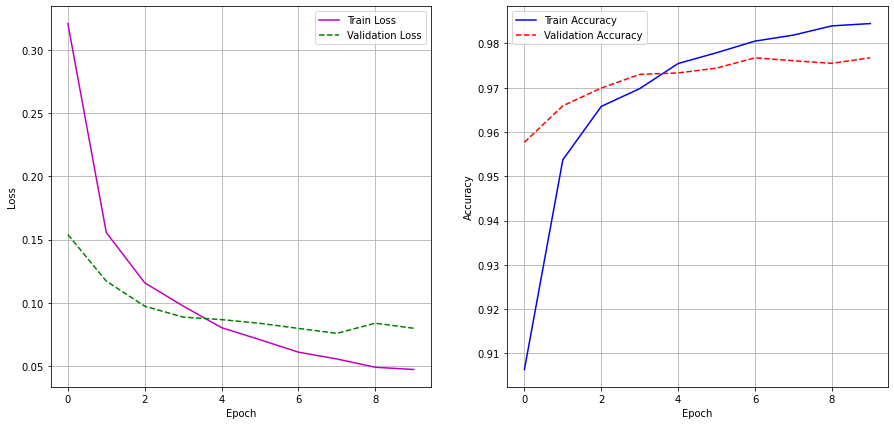

In [7]:
epochs = range(10)

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, hist.history['loss'], 'm-', label = 'Train Loss')
plt.plot(epochs, hist.history['val_loss'], 'g--', label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, hist.history['acc'], 'b-', label = 'Train Accuracy')
plt.plot(epochs, hist.history['val_acc'], 'r--', label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

# Result
- Model : `Sequential()`
- Layer : `Flatten`, `Dense`, `Dropout`, `Dense`
- Parameter : 101,770
- Result : {'Loss' : 0.0474 , 'Accuracy' :  0.9845, 'Val_loss' : 0.0824, 'Val_acc' : 0.9766}

# 레이어 추가해 정확도 높이기

In [3]:
add_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = 3, filters = 64),
                                   tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
                                   tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = 3, filters = 64),
                                    tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = 'softmax')])

add_model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])

add_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [10]:
add_hist = add_model.fit(x_train, y_train, epochs = 10, validation_split= .2)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0449 - acc: 0.9871 - val_loss: 0.0464 - val_acc: 0.9897
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0476 - acc: 0.9867 - val_loss: 0.0530 - val_acc: 0.9877
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0473 - acc: 0.9872 - val_loss: 0.0543 - val_acc: 0.9889
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0414 - acc: 0.9883 - val_loss: 0.0592 - val_acc: 0.9870
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0450 - acc: 0.9876 - val_loss: 0.0502 - val_acc: 0.9885
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0427 - acc: 0.9885 - val_loss: 0.0623 - val_acc: 0.9862
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0387 - acc: 0.9895 - val_loss: 0.0535 - val_acc: 0.9877
Epoch 8/10
1500/1500 [==============================] - 7s 4ms

In [11]:
add_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0650 - acc: 0.9851


[0.06497400254011154, 0.9850999712944031]

# Plotting

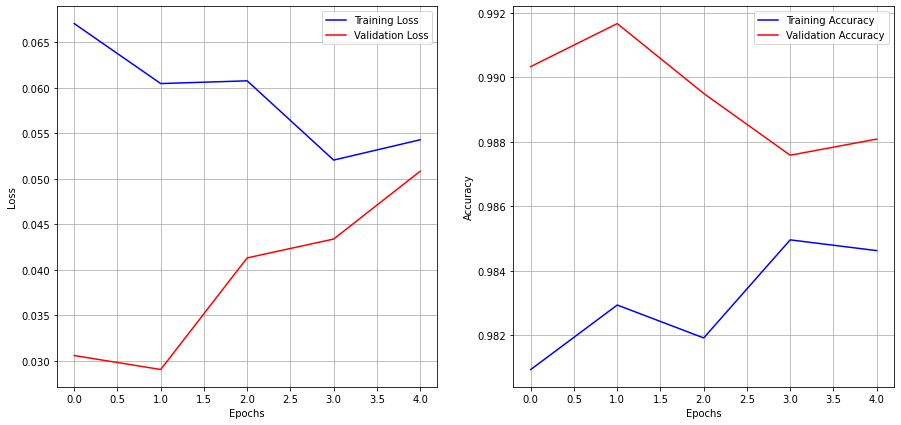

In [9]:
epochs = range(5)

plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, add_hist.history['loss'], 'b-', label = 'Training Loss')
plt.plot(epochs, add_hist.history['val_loss'], 'r-', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, add_hist.history['acc'], 'b-', label = 'Training Accuracy')
plt.plot(epochs, add_hist.history['val_acc'], 'r-', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

# Result
- Model : `Sequential()`
- Layer : `Conv2D`, `MaxPool2D`, `Conv2D`, `MaxPool2D`, `Flatten`, `Dense`, `Dropout`, `Dense`, `Dropout`, `Dense`
- Parameter : 2,024,906
- Result : {'Loss' : 0.0372 , 'Accuracy' :  0.9906, 'Val_loss' : 0.0533, 'Val_acc' : 0.9880}

# Self-handwritting 

In [13]:
#!pip install opencv-python

(28, 28)


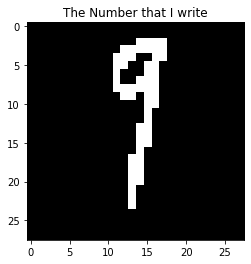

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('Data/Self-Hand-Writting_Test/test_9_3.png', cv2.IMREAD_GRAYSCALE)
# cv2.IMREAD_COLOR >> RGB값 모두를 가진 사진으로 불러와짐
# cv2.IMREAD_GRAYSCALE >> gray scale을 가진 사진으로 불러오기

ret , binary = cv2.threshold(src, 170, 255, cv2.THRESH_BINARY_INV)
# Mnist 데이터처럼 검은 바탕에 흰색 글씨로 만들어주기 > 함수를 통해 '이진화'

myNum = np.asarray(cv2.resize(binary, dsize = (28, 28), interpolation = cv2.INTER_AREA)) / 255
# dsize = (28, 28) >> add_model의 input_shape과 맞춤

plt.title('The Number that I write')
plt.imshow(myNum, cmap = 'gray')
print(myNum.shape)

# Classification

In [74]:
print(np.argmax(add_model.predict(myNum.reshape(-1, 28, 28, 1))[0]))

1


# Result
- True_label 0 > Pred_label 0  `정답`
- True_label 1 > Pred_label 1   `정답`
- True_label 2 > Pred_label 2   `정답`
- True_label 3 > Pred_label 3   `정답`
- True_label 4 > Pred_label 4   `정답`
- True_label 5 > Pred_label 4   `땡`
- True_label 6 > Pred_label 5    `땡`
- True_label 7 > Pred_label 4   `땡`
- True_label 8 > Pred_label 2   `땡`
- True_label 9 > Pred_label 3   `땡`
<br><br></br>
- 예측률 : 50%.......
- Layer가 많아질수록 더 높은 성능, 더 높은 학습시간을 요하기 때문에 성능과 효율의 적정선을 찾는 것이 중요할것
- 숫자를 좀 더 예쁘게 써서 다시 돌려볼 예정

## Result-2
- 오답을 낸 5개의 숫자, 각 3개씩 더 생성
    - True_label 5 : 100%
    - True_label 6 : 66%
    - True_label 7 : 66%
    - True_label 8 : 100%
    - True_label 9 : 66%

- 성능이...... 흠